<a href="https://colab.research.google.com/github/Rifatrony/Face-mask-detection/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!echo 'Installing required software'
!apt-get install -y -qq software-properties-common module-init-tools 2>&1 > /dev/null
!echo 'Add apt-repository with Google.Drive Fuse'
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!echo 'Updating packages...'
!apt-get update -y -qq
!echo 'Installing google-drive-ocamlfuse fuse...'
!apt-get install -y -qq google-drive-ocamlfuse fuse
!echo 'Authenticate Fuse in Google.Drive...'
from google.colab import auth
from oauth2client.client import GoogleCredentials
import getpass
auth.authenticate_user()
creds = GoogleCredentials.get_application_default()
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass('Enter auth code here: ')
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}\

Installing required software
Add apt-repository with Google.Drive Fuse
Updating packages...
Installing google-drive-ocamlfuse fuse...
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 160837 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.26-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Authenticate Fuse in Google.Drive...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Enter auth code here: ··········
Please, open the following URL in a web browser: https://accounts.googl

In [ ]:
#Mount the google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import necessary Libraries
import os
#Set directory path for Dataset
os.chdir("/content/drive/MyDrive/Face Mask Detection")
Dataset='Dataset'
Data_Dir=os.listdir(Dataset)
print(Data_Dir)

['with_mask', 'without_mask']


In [ ]:
#Import necessary libraries
import cv2
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

img_rows, img_cols = 112, 112

images = []
labels = []

for category in Data_Dir:
  folder_path = os.path.join(Dataset, category)
  for img in os.listdir(folder_path):
    img_path = os.path.join(folder_path, img)
    
    img = cv2.imread(img_path)
    try:
      grayscale_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

      resized_img = cv2.resize(grayscale_img,(img_rows, img_cols))
      images.append(resized_img)
      labels.append(category)
      
    except Exception as e:
      print('Exception:',e)

images = np.array(images)/255.0
images = np.reshape(images,(images.shape[0],img_rows, img_cols,1))

lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
labels = np.array(labels)

(train_X, test_X, train_y, test_y) = train_test_split(images, labels, test_size=0.25, random_state=0)



NameError: ignored

# Build Convolutional Neural Network (CNN)

In [ ]:
#import necessary library

from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D

#define model parameters
num_classes = 2
batch_size = 32

# Build CNN model using sequential API
model=Sequential()

# First layer group containing Convolution, relu and MaxPooling layers
model.add(Conv2D(64,(3,3),input_shape=(img_rows, img_cols,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 


# Second layer group containing Convolution, relu and MaxPooling layers

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 

# Flatten and Dropout Layer to stack the output convolutions above as well as cateroverfitting
model.add(Flatten())
model.add(Dropout(0.5))

#Softmax Classifier
model.add(Dense(64,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))

print(model.summary())



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 110, 110, 64)      640       
_________________________________________________________________
activation (Activation)      (None, 110, 110, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 53, 128)       73856     
_________________________________________________________________
activation_1 (Activation)    (None, 53, 53, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 86528)             0

# Training the Model

In [ ]:
from keras.optimizers import Adam
epochs = 50
model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics = ['accuracy'])
fitted_model = model.fit(
    train_X,
    train_y,
    epochs = epochs,
    validation_split=0.25)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
133/133 [==============================] - 48s 34ms/step - loss: 0.7543 - accuracy: 0.5825 - val_loss: 0.5566 - val_accuracy: 0.7041
Epoch 2/50
133/133 [==============================] - 4s 27ms/step - loss: 0.4859 - accuracy: 0.7697 - val_loss: 0.3887 - val_accuracy: 0.8326
Epoch 3/50
133/133 [==============================] - 4s 28ms/step - loss: 0.3336 - accuracy: 0.8461 - val_loss: 0.3764 - val_accuracy: 0.8432
Epoch 4/50
133/133 [==============================] - 4s 27ms/step - loss: 0.2780 - accuracy: 0.8751 - val_loss: 0.3018 - val_accuracy: 0.8814
Epoch 5/50
133/133 [==============================] - 4s 27ms/step - loss: 0.2075 - accuracy: 0.9200 - val_loss: 0.3013 - val_accuracy: 0.8771
Epoch 6/50
133/133 [==============================] - 4s 27ms/step - loss: 0.1886 - accuracy: 0.9260 - val_loss: 0.3066 - val_accuracy: 0.8905
Epoch 7/50
133/133 [==============================] - 4s 27ms/step - loss: 0.1614 - accuracy: 0.9384 - val_loss: 0.2957 - val_accuracy: 0.892

## Plot the training loss accuracy

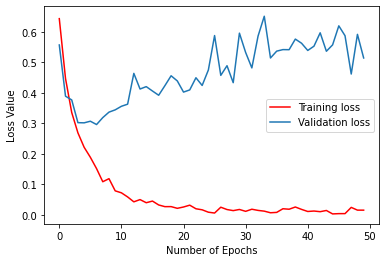

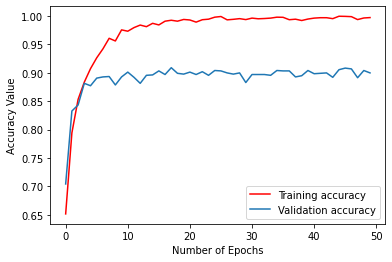

In [ ]:
from matplotlib import pyplot as plt
# PLOT TRAINING AND VALIDATION LOSS
plt.plot(fitted_model.history['loss'],'r',label='Training loss')
plt.plot(fitted_model.history['val_loss'],label='Validation loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

# PLOT TRAINING AND  VALIDATION ACCURACY
plt.plot(fitted_model.history['accuracy'],'r',label='Training accuracy')
plt.plot(fitted_model.history['val_accuracy'],label='Validation accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Value')
plt.legend()
plt.show()

## Save or Serialized the Model

In [ ]:
model.save('Face_mask_detection_system.h5')